In [13]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
from scipy.stats import pearsonr
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns 

**How much of a factor does the driver have on headway and on-time performance?**

- OPERATOR: Indicates the operator (driver)
- HDWY_DEV: calculates headway deviation in minutes as the difference between actual and scheduled headway. Negative values indicate a shorter headway than scheduled (i.e. bunching) and positive values indicate a longer headway than scheduled (i.e. gapping). 

Dependent variables:
- Headway (measured in seconds or any appropriate unit).
- On-time performance (usually measured as a binary variable, such as 1 for on time and 0 for late).

Independent variables:
- Driver-related factors (e.g., experience, training, behavior, etc.).
- Other potential independent variables like road conditions, weather, or vehicle maintenance.

In [14]:
processed_data = pd.read_csv("../data/processed_data.csv")
processed_data.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC,Z_HDWY_DEV,Z_ADHERENCE,UNIQUE_TRIP_ID,PREVIOUS_ADHERENCE,NEXT_ADHERENCE
0,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0.0,0,80,0.0,-0.032222,-0.139835,0.510757,120230801_345106,NaN,-1.916666
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0.0,0,70,0.0,0.056190,0.202259,0.244098,120230801_345106,-0.183333,-1.716666


How many unique operators are there? 

In [10]:
processed_data['OPERATOR'].nunique()

333

**Correlation Coefficient** - Headway

In [11]:
# comparing to 'headway'
corr = processed_data['OPERATOR'].corr(processed_data['HDWY_DEV'])

print(corr)

-0.00200820947623818


There seems to be a weak relationship between OPERATOR and HDWY_DEV (amount of time you wait at a stop in between buses).

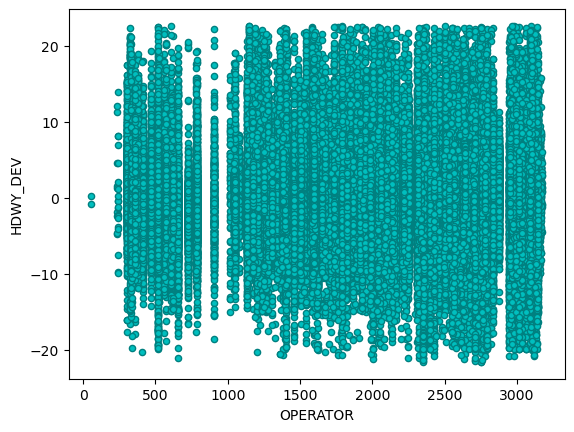

In [36]:
processed_data.plot.scatter(x = 'OPERATOR', y = 'HDWY_DEV', s = 20, color = 'c', edgecolor = 'teal', linewidth=1); #cyan

**Regression Model**

- For linear regression, you're trying to find the relationship between driver-related factors and headway.

- For logistic regression, you're trying to find the relationship between driver-related factors and on-time performance.

**Correlation Coefficient** - Actual arrival time

aka "on-time performance"

**Linear Regression Model**

lm = smf.ols('target variable ~ predictor variable', data = df).fit()

lm.summary()

In [37]:
lm = smf.ols('HDWY_DEV ~ OPERATOR', data = processed_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               HDWY_DEV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.710
Date:                Sun, 05 Nov 2023   Prob (F-statistic):              0.191
Time:                        23:41:04   Log-Likelihood:            -7.5907e+05
No. Observations:              254299   AIC:                         1.518e+06
Df Residuals:                  254297   BIC:                         1.518e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1733      0.026      6.748      0.000       0.123       0.224
OPERATOR    -1.61e-05   1.23e-05     -1.308      0.191   -4.02e-05    8.03e-06
==============================================================================
Omnibus:                    20015.663   Durbin-Watson:                   0.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70382.345
Skew:                           0.363   Prob(JB):                         0.00
Kurtosis:                       5.473   Cond. No.                     5.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question:** Does the operator have any impact on the NEXT_ADHERENCE based on its PREVIOUS_ADHERENCE? 

In [46]:
lm = smf.ols('NEXT_ADHERENCE ~ OPERATOR + PREVIOUS_ADHERENCE', data = processed_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         NEXT_ADHERENCE   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 6.299e+04
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:02:31   Log-Likelihood:            -3.1762e+05
No. Observations:              130280   AIC:                         6.352e+05
Df Residuals:                  130277   BIC:                         6.353e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.7095      0.022    -32.884      0.000      -0.752      -0.667
OPERATOR              -0.0001   9.95e-06    -14.590      0.000      -0.000      -0.000
PREVIOUS_ADHERENCE     0.7451      0.002    353.454      0.000       0.741       0.749
==============================================================================
Omnibus:                    34749.018   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           259318.932
Skew:                          -1.084   Prob(JB):                         0.00
Kurtosis:                       9.563   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Results:**
- R-squared of 0.492: this model explains about 49.2% of the variance in NEXT_ADHERENCE. 
- With a large F-statistic and a very low F-statistic p-value, this means this model is statistically significant. 
- The p-values associated with the t-statistics are very low (close to 0), which means that they're statistically significant. 

mean(NEXT_ADHERENCE) = -0.7095(NEXT_ADHERENCE) - .0001(OPERATOR) + .7451(PREVIOUS_ADHERENCE)
- For every unit change in PREVIOUS_ADHERENCE, NEXT_ADHERENCE is supposed to increase by .7451 units. With the OPERATOR being so close to zero, this means that it has no impact on NEXT_ADHERENCE. 

**Question:** Does the operator have any impact on the NEXT_HDWY_DEV based on its PREVIOUS_HDWY_DEV? 

In [44]:
# Group the data by 'OPERATOR' and 'UNIQUE_TRIP_ID'
grouped_data = processed_data.groupby(['OPERATOR', 'UNIQUE_TRIP_ID'])

# Create a list to store DataFrames of results
results_dfs = []

# Iterate through the grouped data
for (operator, trip_id), group in grouped_data:
    mean_prev_adherence = group['PREVIOUS_ADHERENCE'].mean()
    mean_next_adherence = group['NEXT_ADHERENCE'].mean()
    
    # Create a DataFrame for the current group
    group_results = pd.DataFrame({'OPERATOR': [operator],
                                  'UNIQUE_TRIP_ID': [trip_id],
                                  'MEAN_PREVIOUS_ADHERENCE': [mean_prev_adherence],
                                  'MEAN_NEXT_ADHERENCE': [mean_next_adherence]})
    
    # Append the group's DataFrame to the list
    results_dfs.append(group_results)

# Concatenate all the DataFrames in the list to create 'results_df'
results_df = pd.concat(results_dfs, ignore_index=True)

# You now have a DataFrame 'results_df' that contains the mean previous adherence
# and mean next adherence for each trip, grouped by operator.
results_df.head()

,OPERATOR,UNIQUE_TRIP_ID,MEAN_PREVIOUS_ADHERENCE,MEAN_NEXT_ADHERENCE
0,56,120230818_353106,-2.900000,-1.908334
1,235,120230830_350491,-5.408333,-6.916666
2,235,120230830_350492,2.083333,-1.016667
3,235,120230830_350493,NaN,-6.733333
4,244,120230918_352640,-0.816666,-1.658333


In [45]:
results_df['OPERATOR'].nuniquee()

333

**Box Plots** - Work with a subset of the data

In [20]:
subset = headway_data.iloc[:49]
# subset.to_csv('../data/subset.csv', sep='\t' , index=False)
subset.head(3)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,HDWY_DEV_PERC
0,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,2.666666,0,0,1,0,0.0,0,63,13.216666,0.076190
1,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1.966666,0,0,1,0,0.0,0,70,0.000000,0.056190
2,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,-0.483334,0,0,1,0,0.0,0,80,0.000000,-0.032222


In [21]:
subset['OPERATOR'].unique()

array([1040, 2374, 2689], dtype=int64)

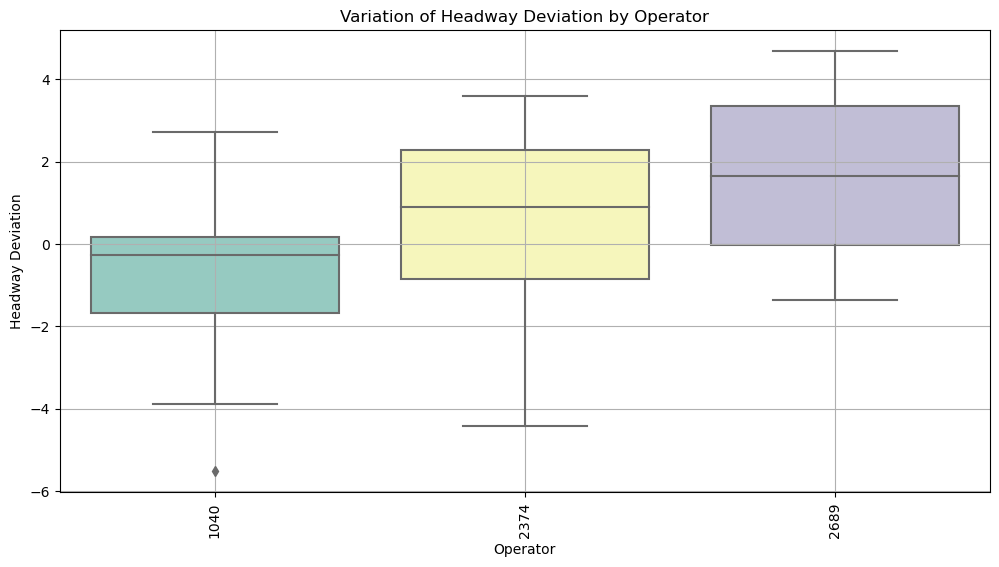

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='OPERATOR', y='HDWY_DEV', palette='Set3')
plt.xlabel('Operator')
plt.ylabel('Headway Deviation')
plt.title('Variation of Headway Deviation by Operator')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

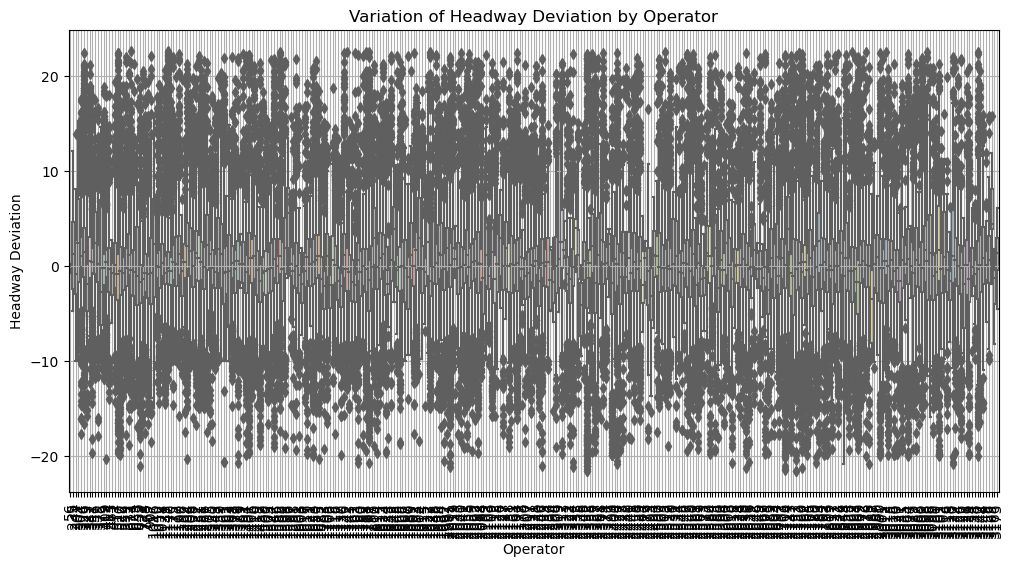

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=processed_data, x='OPERATOR', y='HDWY_DEV', palette='Set3')
plt.xlabel('Operator')
plt.ylabel('Headway Deviation')
plt.title('Variation of Headway Deviation by Operator')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

1. Group the data by 'OPERATOR' and calculate the mean headway deviation for each operator
operator_mean_hdwy_dev = headway_data.groupby('OPERATOR')['HDWY_DEV'].mean()

2. Sort the operators by mean headway deviation in descending order and select the top N
top_n_operators = operator_mean_hdwy_dev.sort_values(ascending=False).head(10) # selecting top 10

3. Create a bar chart for the top N operators
plt.figure(figsize=(12, 6))
sns.barplot(x=top_n_operators.index, y=top_n_operators, palette='Set3')
plt.xlabel('Operator')
plt.ylabel('Mean Headway Deviation')
plt.title(f'Top {10} Operators with Mean Headway Deviation Closest to Zero')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()